In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime as dt
import plotly.express as px

In [84]:
tsla = pd.read_csv('/content/Tesla_Stock.csv',index_col=0,parse_dates=True)

In [85]:
tsla

,Open,High,Low,Close,Volume
Date,,,,,
2012-01-03,28.94,29.50,27.65,28.08,928052
2012-01-04,28.21,28.67,27.50,27.71,630036
2012-01-05,27.76,27.93,26.85,27.12,1005432
2012-01-06,27.20,27.79,26.41,26.89,687081
2012-01-09,27.00,27.49,26.12,27.25,896951
...,...,...,...,...,...
2016-12-23,208.00,213.45,207.71,213.34,4670464
2016-12-27,214.88,222.25,214.42,219.53,5915732
2016-12-28,221.53,223.80,217.20,219.74,3782456


In [86]:
ford = pd.read_csv('/content/Ford_Stock.csv',index_col=0,parse_dates=True)

In [87]:
ford

,Open,High,Low,Close,Volume
Date,,,,,
2012-01-03,11.00,11.25,10.99,11.13,45709811
2012-01-04,11.15,11.53,11.07,11.30,79725188
2012-01-05,11.33,11.63,11.24,11.59,67877467
2012-01-06,11.74,11.80,11.52,11.71,59840605
2012-01-09,11.83,11.95,11.70,11.80,53981467
...,...,...,...,...,...
2016-12-23,12.43,12.46,12.36,12.46,15621178
2016-12-27,12.43,12.51,12.36,12.39,19467440
2016-12-28,12.37,12.45,12.22,12.25,26875381


In [88]:
gm = pd.read_csv('/content/GM_Stock.csv',index_col=0,parse_dates=True)
gm

,Open,High,Low,Close,Volume
Date,,,,,
2012-01-03,20.83,21.18,20.75,21.05,9321420
2012-01-04,21.05,21.37,20.75,21.15,7856752
2012-01-05,21.10,22.29,20.96,22.17,17884040
2012-01-06,22.26,23.03,22.24,22.92,18234608
2012-01-09,23.20,23.43,22.70,22.84,12091714
...,...,...,...,...,...
2016-12-23,35.83,35.87,35.54,35.69,9351152
2016-12-27,35.80,35.93,35.50,35.54,6008707
2016-12-28,35.74,35.80,35.13,35.15,8451852


In [89]:
allopen= pd.concat([tsla.Open,gm.Open,ford.Open],axis=1)
allopen.columns = 'TSLA GM FORD'.split()
allopen

,TSLA,GM,FORD
Date,,,
2012-01-03,28.94,20.83,11.00
2012-01-04,28.21,21.05,11.15
2012-01-05,27.76,21.10,11.33
2012-01-06,27.20,22.26,11.74
2012-01-09,27.00,23.20,11.83
...,...,...,...
2016-12-23,208.00,35.83,12.43
2016-12-27,214.88,35.80,12.43
2016-12-28,221.53,35.74,12.37


In [90]:
# open price for all stocks

#fig,ax= plt.subplots(figsize=(15,10))
px.line(allopen)
#sns.lineplot(allopen)

In [91]:
# Volume of stock traded each day
# volume -> no of shares traded during the day

allvolume = pd.concat([tsla.Volume,gm.Volume,ford.Volume],axis=1)
allvolume.columns = 'TSLA GM FORD'.split()
allvolume

,TSLA,GM,FORD
Date,,,
2012-01-03,928052,9321420,45709811
2012-01-04,630036,7856752,79725188
2012-01-05,1005432,17884040,67877467
2012-01-06,687081,18234608,59840605
2012-01-09,896951,12091714,53981467
...,...,...,...
2016-12-23,4670464,9351152,15621178
2016-12-27,5915732,6008707,19467440
2016-12-28,3782456,8451852,26875381


In [92]:
px.line(allvolume)

In [93]:
# from the allvolume plot , ford had the really big spike in late 2013.

ford[ford['Volume']==ford['Volume'].max()].index[0]

Timestamp('2013-12-18 00:00:00')

In [94]:
# total trade in a day = open price * volume

tsla['Total_Traded']= tsla['Open']*tsla['Volume']
gm['Total_Traded']= gm['Open']*gm['Volume']
ford['Total_Traded']= ford['Open']*ford['Volume']

In [95]:
alltotal_traded= pd.concat([tsla['Total_Traded'],gm['Total_Traded'],ford['Total_Traded']],axis=1)
alltotal_traded.columns = 'TSLA GN FORD'.split()
alltotal_traded

,TSLA,GN,FORD
Date,,,
2012-01-03,2.685782e+07,1.941652e+08,5.028079e+08
2012-01-04,1.777332e+07,1.653846e+08,8.889358e+08
2012-01-05,2.791079e+07,3.773532e+08,7.690517e+08
2012-01-06,1.868860e+07,4.059024e+08,7.025287e+08
2012-01-09,2.421768e+07,2.805278e+08,6.386008e+08
...,...,...,...
2016-12-23,9.714565e+08,3.350518e+08,1.941712e+08
2016-12-27,1.271172e+09,2.151117e+08,2.419803e+08
2016-12-28,8.379275e+08,3.020692e+08,3.324485e+08


In [96]:
px.line(alltotal_traded)

In [97]:
# From the total_traded plot , Tesla has traded huge amount of money in early 2014
tsla[tsla['Total_Traded'] == tsla['Total_Traded'].max()].index[0]

Timestamp('2014-02-25 00:00:00')

<Axes: xlabel='Date'>

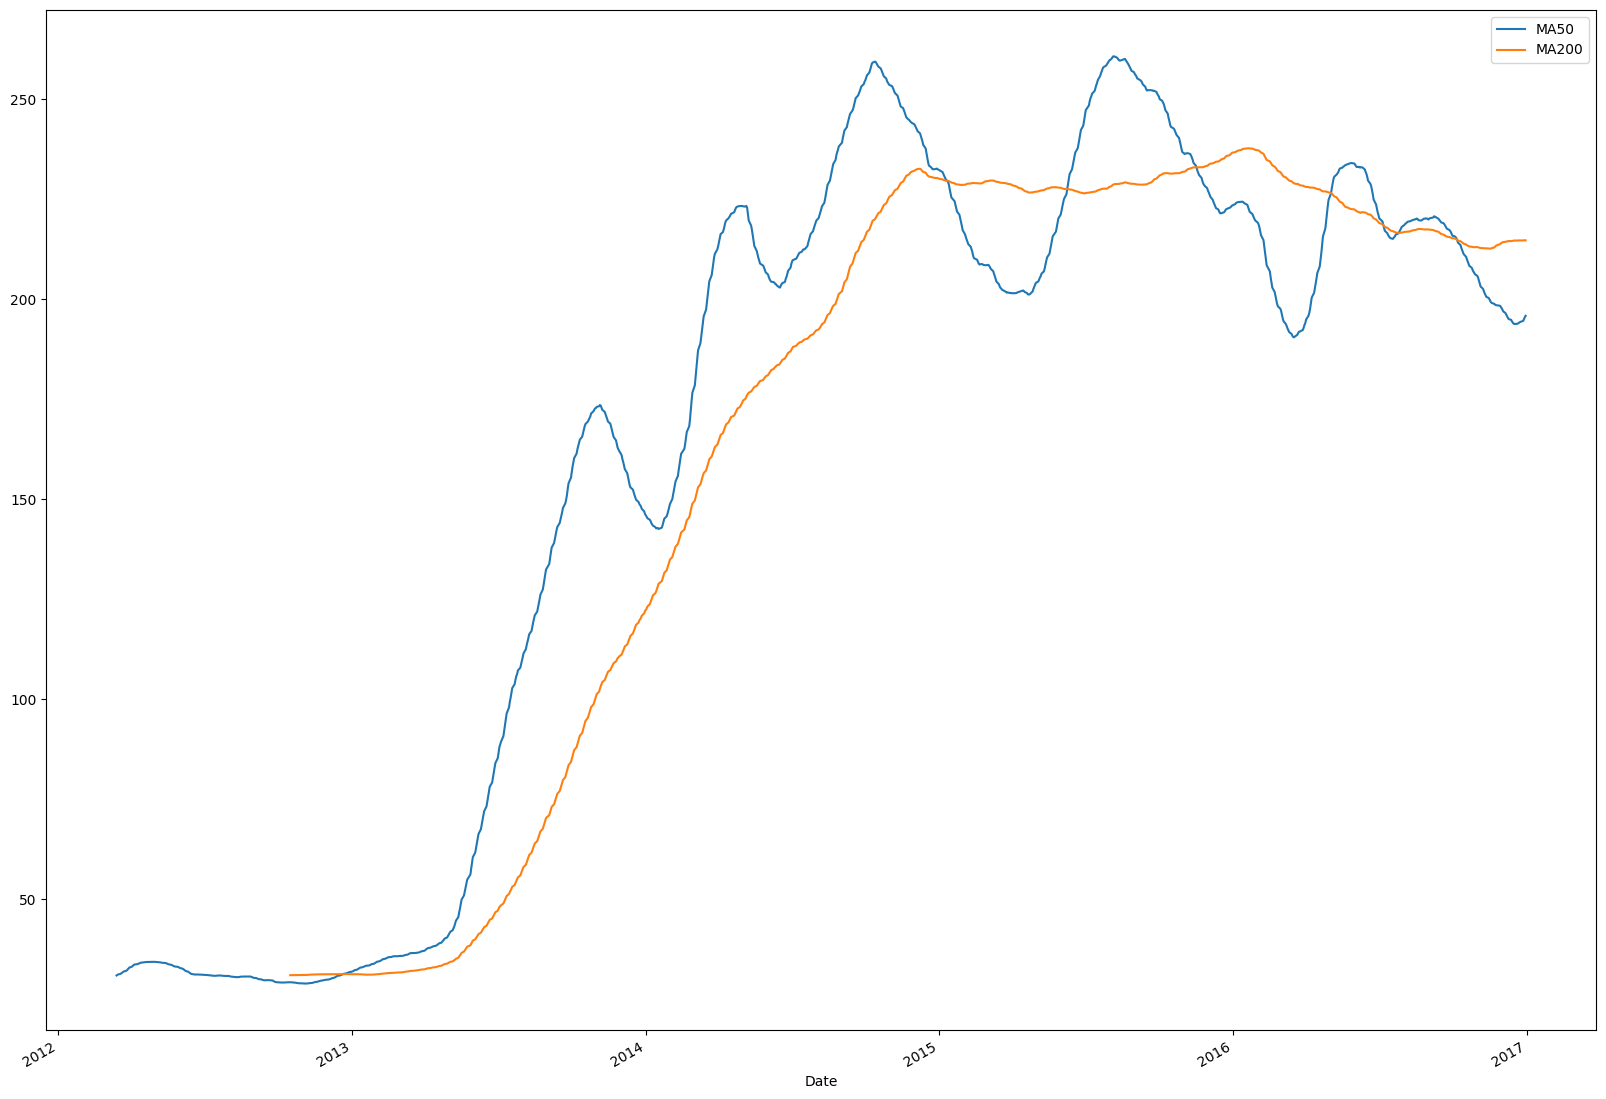

In [98]:
#Moving Averages(MA) for TESLA

tsla['MA50'] = tsla['Open'].rolling(50).mean()
tsla['MA200'] = tsla['Open'].rolling(200).mean()

tsla.iloc[:,-2:].plot(figsize=(20,15))

<Axes: xlabel='Date'>

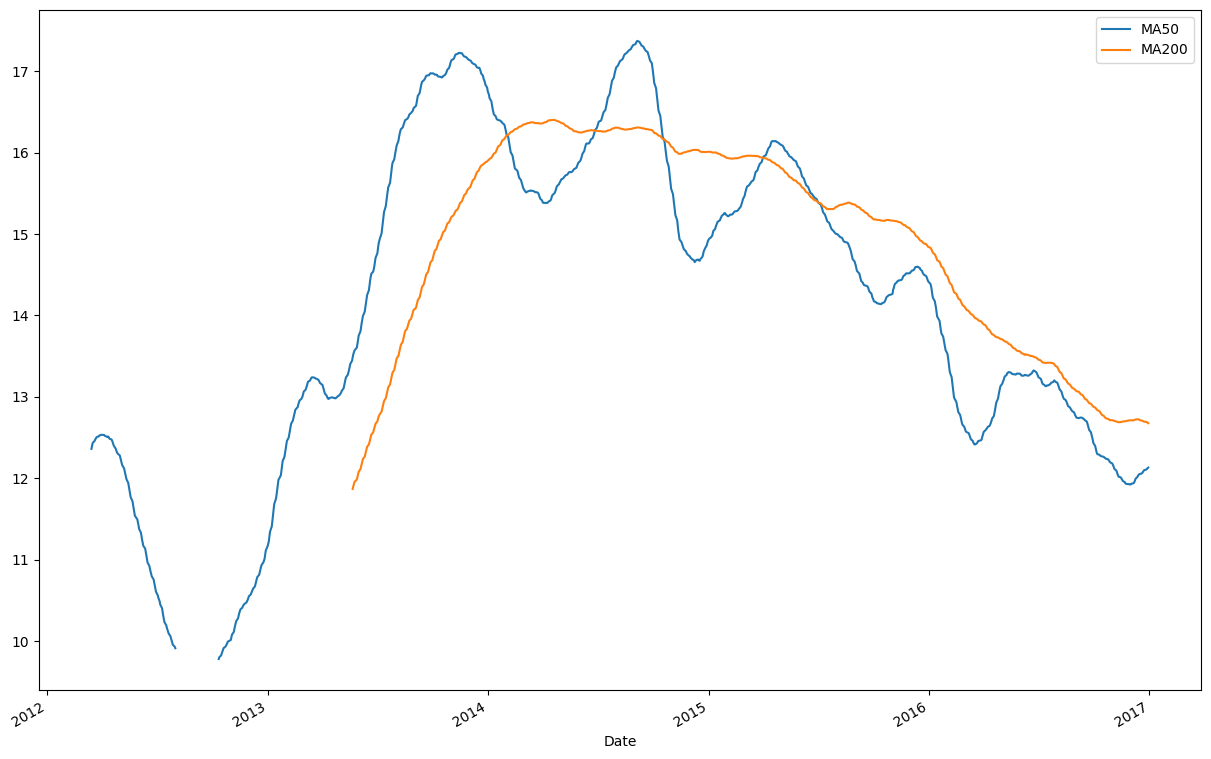

In [99]:
# Moving Averages(MA) for FORD

ford['MA50']= ford['Open'].rolling(50).mean()
ford['MA200']= ford['Open'].rolling(200).mean()

ford.iloc[:,-2:].plot(figsize=(15,10))


<Axes: xlabel='Date'>

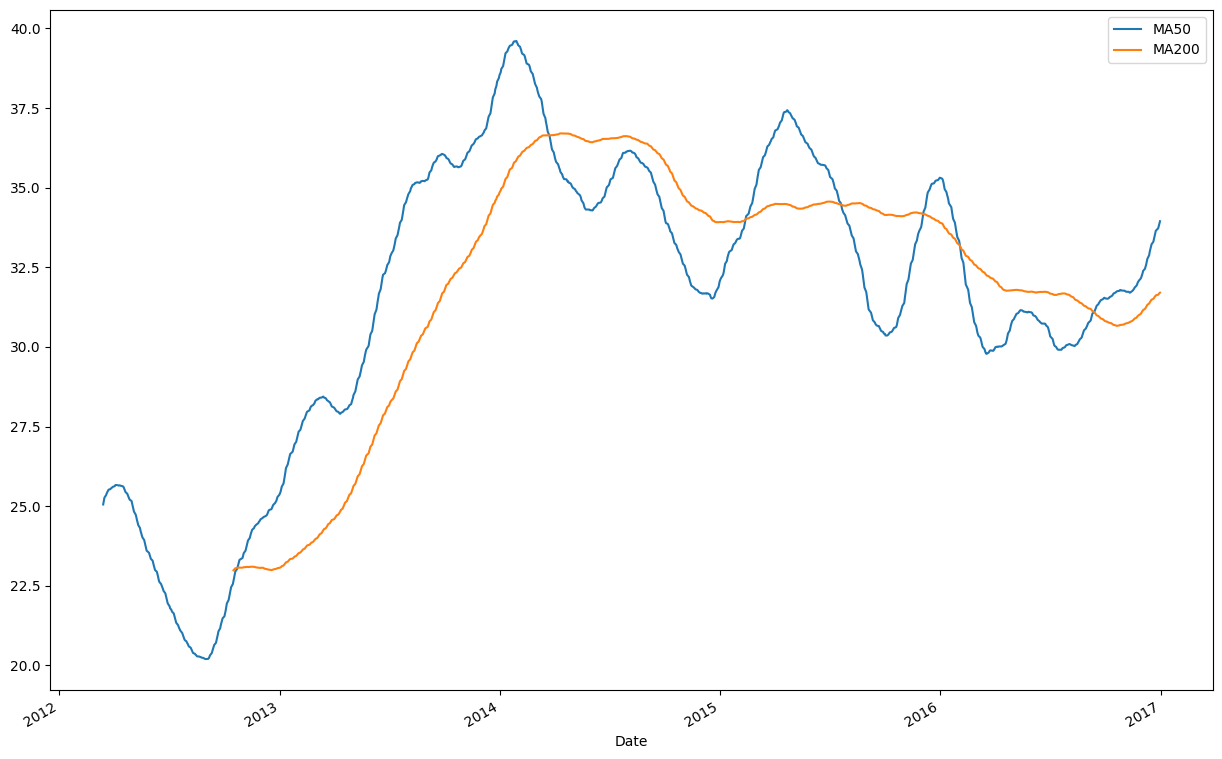

In [100]:
# Moving Averages(MA) for GM

gm['MA50']= gm['Open'].rolling(50).mean()
gm['MA200']= gm['Open'].rolling(200).mean()

gm.iloc[:,-2:].plot(figsize=(15,10))

In [101]:
#plotting open and MA togther

px.line(tsla[['Open','MA50','MA200']])

In [102]:
px.line(ford[['Open','MA50','MA200']])

In [103]:
px.line(gm[['Open','MA50','MA200']])

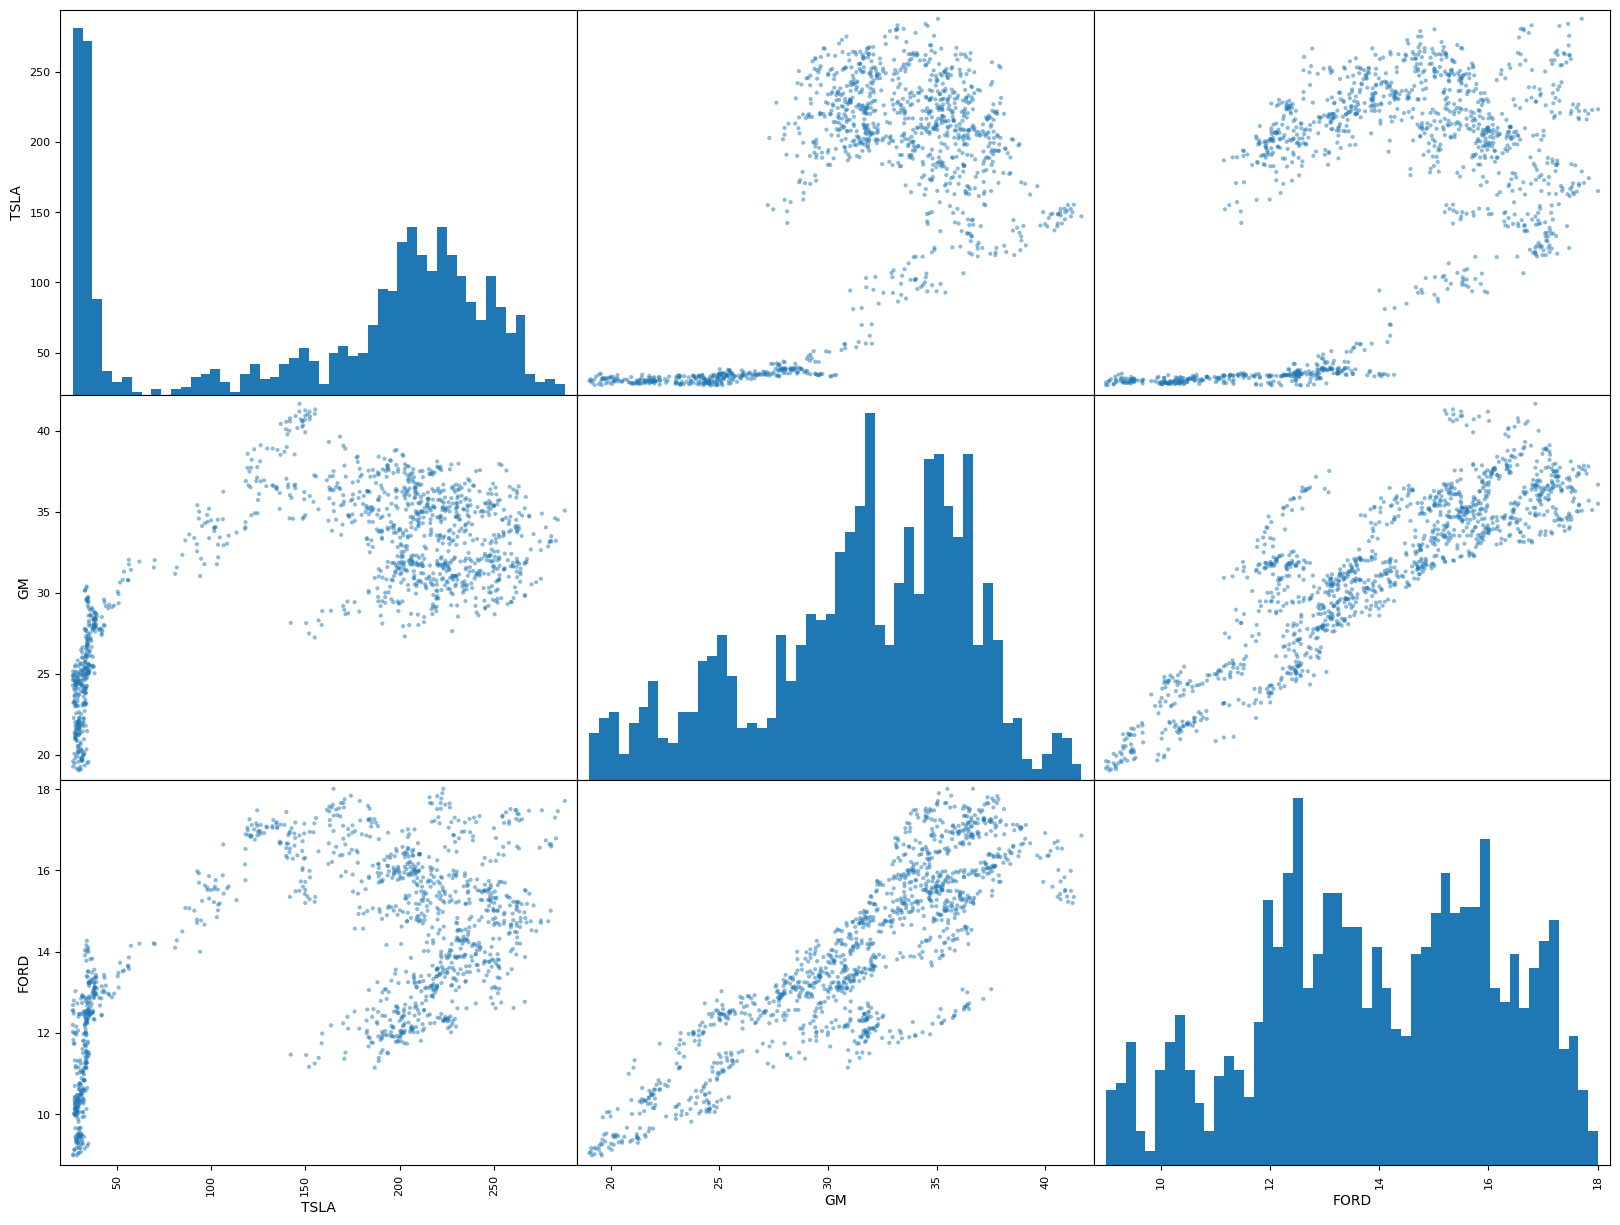

In [104]:
from pandas.plotting import scatter_matrix
scatter_matrix(allopen,figsize=(20,15),hist_kwds={'bins':50})
plt.show()

In [105]:
import plotly.graph_objects as go

In [29]:
# Candlestick Chart

# for Ford
fig= go.Figure(data=[go.Candlestick(x=ford.index,open=ford.Open,high=ford.High,low=ford.Low,close=ford.Close)])
fig.show()

In [106]:
# for GM

fig= go.Figure(data=[go.Candlestick(x=gm.index,open=gm.Open,high=gm.High,low=gm.Low,close=gm.Close)])
fig.show()

In [107]:
# For Tesla

fig= go.Figure(data=[go.Candlestick(x=tsla.index,open=tsla.Open,high=tsla.High,low=tsla.Low,close=tsla.Close)])
fig.show()

In [108]:
# Daily percentage change

# rt = (pt/pt-1)-1
# rt -> return at time t
# pt -> price at time t
# pt-1 -> price of previous day

tsla['Returns'] = tsla['Close'].pct_change()
gm['Returns'] = gm['Close'].pct_change()
ford['Returns'] = ford['Close'].pct_change()


In [109]:
tsla

,Open,High,Low,Close,Volume,Total_Traded,MA50,MA200,Returns
Date,,,,,,,,,
2012-01-03,28.94,29.50,27.65,28.08,928052,2.685782e+07,NaN,NaN,NaN
2012-01-04,28.21,28.67,27.50,27.71,630036,1.777332e+07,NaN,NaN,-0.013177
2012-01-05,27.76,27.93,26.85,27.12,1005432,2.791079e+07,NaN,NaN,-0.021292
2012-01-06,27.20,27.79,26.41,26.89,687081,1.868860e+07,NaN,NaN,-0.008481
2012-01-09,27.00,27.49,26.12,27.25,896951,2.421768e+07,NaN,NaN,0.013388
...,...,...,...,...,...,...,...,...,...
2016-12-23,208.00,213.45,207.71,213.34,4670464,9.714565e+08,194.3384,214.73520,0.023459
2016-12-27,214.88,222.25,214.42,219.53,5915732,1.271172e+09,194.6228,214.74635,0.029015
2016-12-28,221.53,223.80,217.20,219.74,3782456,8.379275e+08,195.1124,214.78265,0.000957


In [110]:
gm

,Open,High,Low,Close,Volume,Total_Traded,MA50,MA200,Returns
Date,,,,,,,,,
2012-01-03,20.83,21.18,20.75,21.05,9321420,1.941652e+08,NaN,NaN,NaN
2012-01-04,21.05,21.37,20.75,21.15,7856752,1.653846e+08,NaN,NaN,0.004751
2012-01-05,21.10,22.29,20.96,22.17,17884040,3.773532e+08,NaN,NaN,0.048227
2012-01-06,22.26,23.03,22.24,22.92,18234608,4.059024e+08,NaN,NaN,0.033829
2012-01-09,23.20,23.43,22.70,22.84,12091714,2.805278e+08,NaN,NaN,-0.003490
...,...,...,...,...,...,...,...,...,...
2016-12-23,35.83,35.87,35.54,35.69,9351152,3.350518e+08,33.6438,31.61535,0.000000
2016-12-27,35.80,35.93,35.50,35.54,6008707,2.151117e+08,33.7246,31.63845,-0.004203
2016-12-28,35.74,35.80,35.13,35.15,8451852,3.020692e+08,33.8026,31.66285,-0.010974


In [111]:
ford

,Open,High,Low,Close,Volume,Total_Traded,MA50,MA200,Returns
Date,,,,,,,,,
2012-01-03,11.00,11.25,10.99,11.13,45709811,5.028079e+08,NaN,NaN,NaN
2012-01-04,11.15,11.53,11.07,11.30,79725188,8.889358e+08,NaN,NaN,0.015274
2012-01-05,11.33,11.63,11.24,11.59,67877467,7.690517e+08,NaN,NaN,0.025664
2012-01-06,11.74,11.80,11.52,11.71,59840605,7.025287e+08,NaN,NaN,0.010354
2012-01-09,11.83,11.95,11.70,11.80,53981467,6.386008e+08,NaN,NaN,0.007686
...,...,...,...,...,...,...,...,...,...
2016-12-23,12.43,12.46,12.36,12.46,15621178,1.941712e+08,12.0978,12.69495,0.004839
2016-12-27,12.43,12.51,12.36,12.39,19467440,2.419803e+08,12.1072,12.69070,-0.005618
2016-12-28,12.37,12.45,12.22,12.25,26875381,3.324485e+08,12.1164,12.68695,-0.011299


Text(0.5, 1.0, 'Tesla Returns')

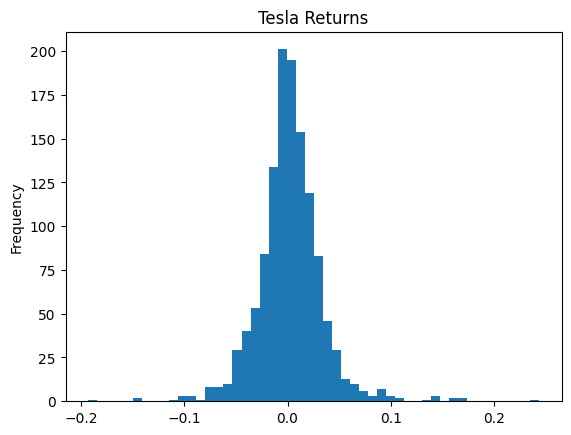

In [112]:
tsla['Returns'].plot(kind='hist',bins=50)
plt.title('Tesla Returns')

Text(0.5, 1.0, 'GM Returns')

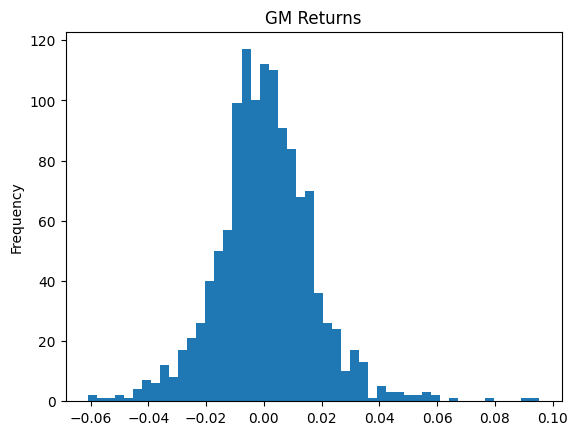

In [113]:
gm['Returns'].plot(kind='hist',bins=50)
plt.title('GM Returns')

Text(0.5, 1.0, 'Ford Returns')

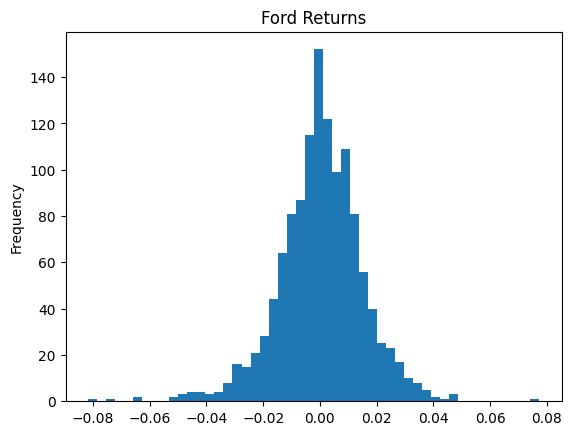

In [114]:
ford['Returns'].plot(kind='hist',bins=50)
plt.title('Ford Returns')

In [115]:
all_return = pd.concat([tsla['Returns'],gm['Returns'],ford['Returns']],axis=1)
all_return.columns= 'TSLA GM FORD'.split()

# Histogram for all_return
px.histogram(all_return)

<Axes: ylabel='Density'>

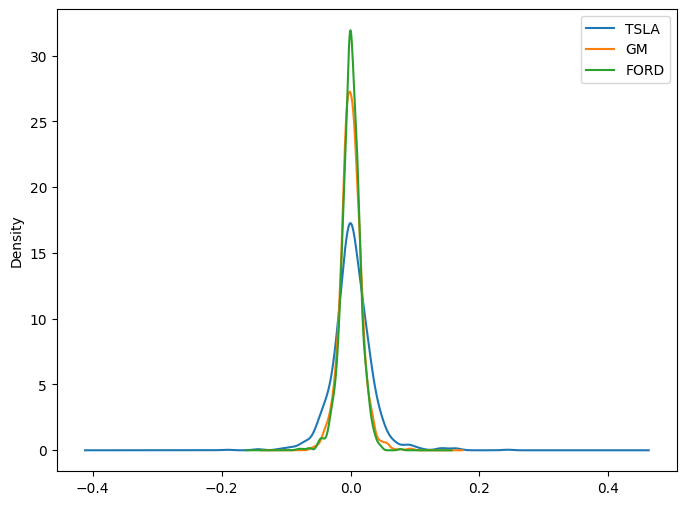

In [116]:
# KDE plot for all returns

all_return.plot(kind='kde',figsize=(8,6))

In [117]:
px.box(all_return,title='Stock Return Box Plot')

array([[<Axes: xlabel='TSLA', ylabel='TSLA'>,
        <Axes: xlabel='GM', ylabel='TSLA'>,
        <Axes: xlabel='FORD', ylabel='TSLA'>],
       [<Axes: xlabel='TSLA', ylabel='GM'>,
        <Axes: xlabel='GM', ylabel='GM'>,
        <Axes: xlabel='FORD', ylabel='GM'>],
       [<Axes: xlabel='TSLA', ylabel='FORD'>,
        <Axes: xlabel='GM', ylabel='FORD'>,
        <Axes: xlabel='FORD', ylabel='FORD'>]], dtype=object)

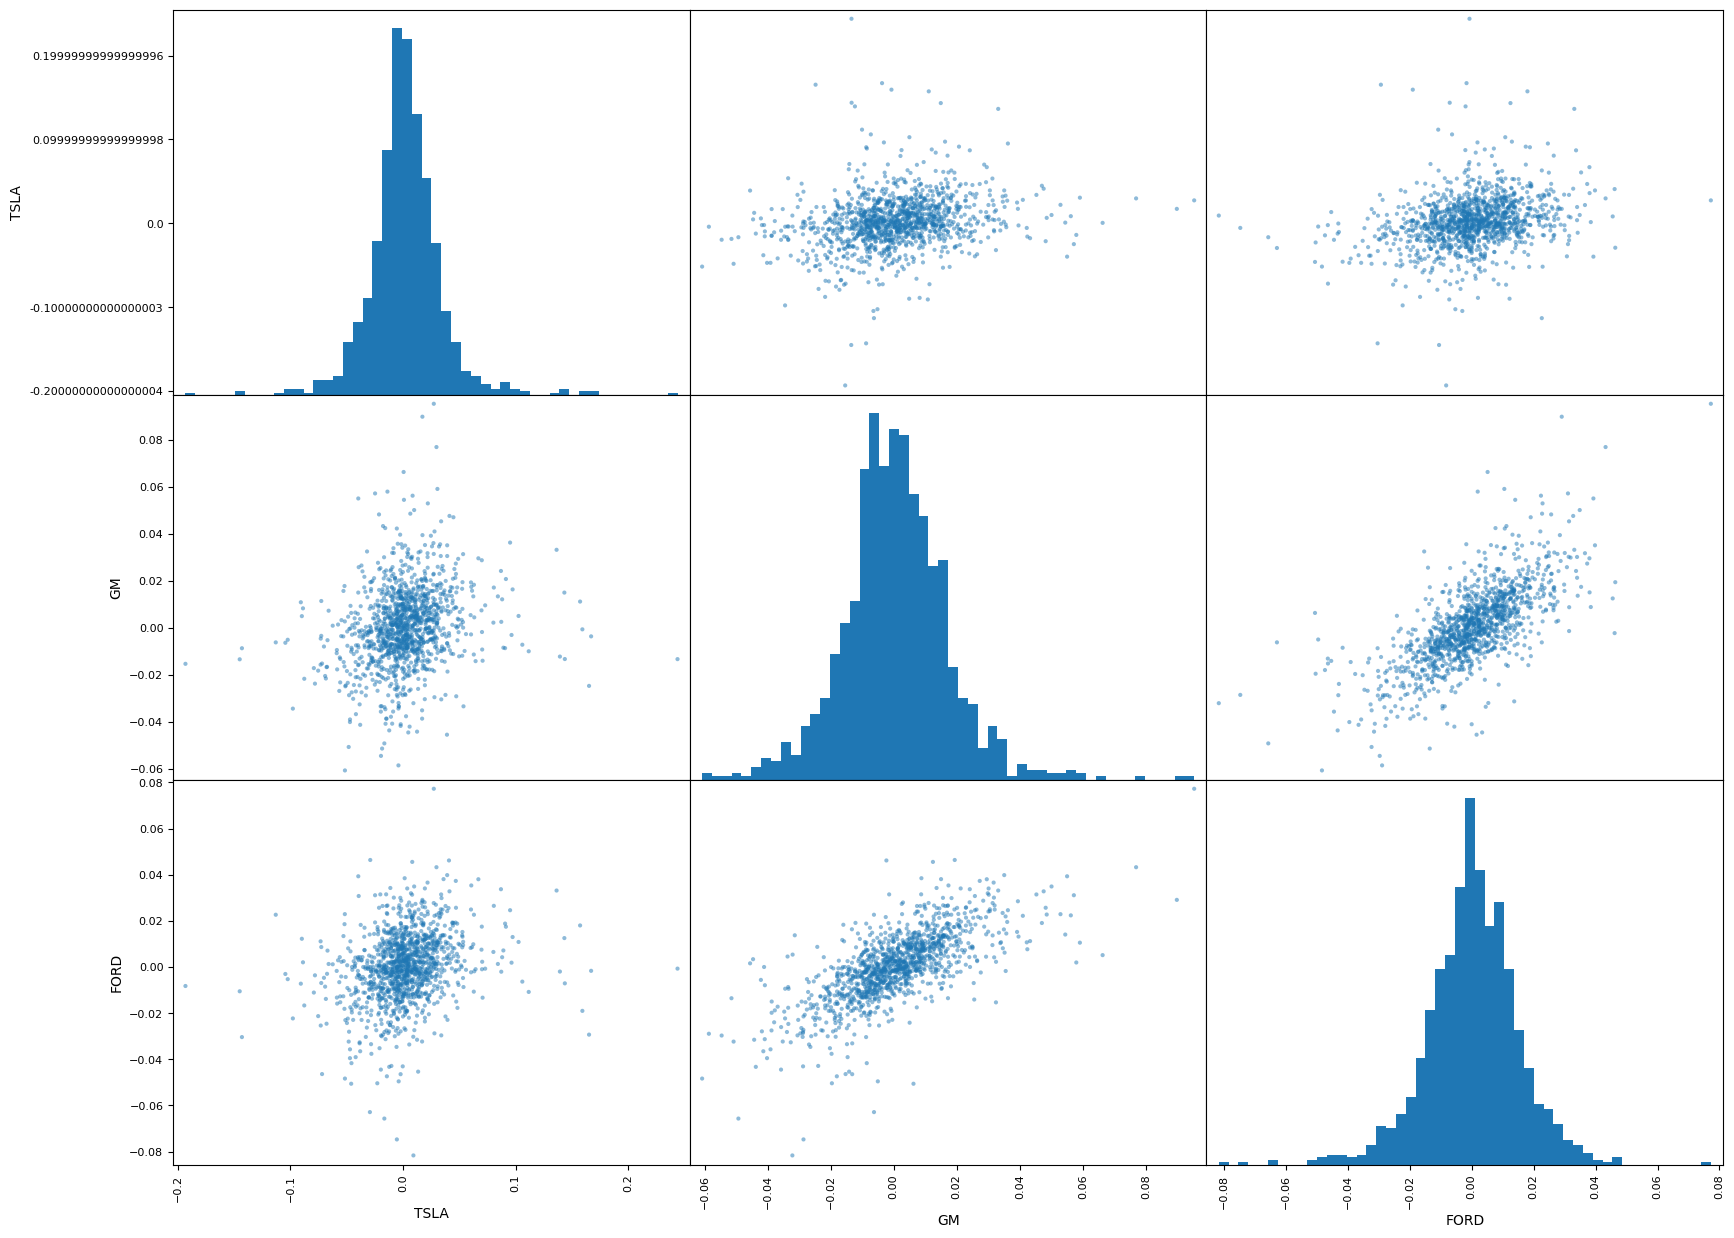

In [118]:
# Scatter matrix plot for correlation between each of the stocks daily returns
scatter_matrix(all_return, figsize=(20,15), hist_kwds={'bins':50})

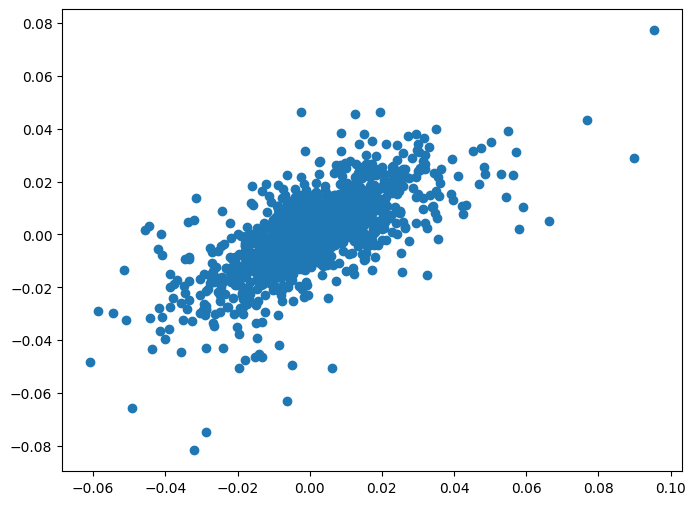

In [119]:
plt.figure(figsize=(8,6))
plt.scatter(gm['Returns'],ford['Returns'])

In [120]:
# Cummulative Daily Returns
# If cummulative daily returns is above one,means profit made else loss made.

# df[daily_cumulative_return] = ( 1 + df[pct_daily_return] ).cumprod()

tsla['Daily_Cr'] = (1+tsla['Returns']).cumprod()
gm['Daily_Cr'] = (1+gm['Returns']).cumprod()
ford['Daily_Cr'] = (1+ford['Returns']).cumprod()


In [121]:
tsla

,Open,High,Low,Close,Volume,Total_Traded,MA50,MA200,Returns,Daily_Cr
Date,,,,,,,,,,
2012-01-03,28.94,29.50,27.65,28.08,928052,2.685782e+07,NaN,NaN,NaN,NaN
2012-01-04,28.21,28.67,27.50,27.71,630036,1.777332e+07,NaN,NaN,-0.013177,0.986823
2012-01-05,27.76,27.93,26.85,27.12,1005432,2.791079e+07,NaN,NaN,-0.021292,0.965812
2012-01-06,27.20,27.79,26.41,26.89,687081,1.868860e+07,NaN,NaN,-0.008481,0.957621
2012-01-09,27.00,27.49,26.12,27.25,896951,2.421768e+07,NaN,NaN,0.013388,0.970442
...,...,...,...,...,...,...,...,...,...,...
2016-12-23,208.00,213.45,207.71,213.34,4670464,9.714565e+08,194.3384,214.73520,0.023459,7.597578
2016-12-27,214.88,222.25,214.42,219.53,5915732,1.271172e+09,194.6228,214.74635,0.029015,7.818020
2016-12-28,221.53,223.80,217.20,219.74,3782456,8.379275e+08,195.1124,214.78265,0.000957,7.825499


In [122]:
gm

,Open,High,Low,Close,Volume,Total_Traded,MA50,MA200,Returns,Daily_Cr
Date,,,,,,,,,,
2012-01-03,20.83,21.18,20.75,21.05,9321420,1.941652e+08,NaN,NaN,NaN,NaN
2012-01-04,21.05,21.37,20.75,21.15,7856752,1.653846e+08,NaN,NaN,0.004751,1.004751
2012-01-05,21.10,22.29,20.96,22.17,17884040,3.773532e+08,NaN,NaN,0.048227,1.053207
2012-01-06,22.26,23.03,22.24,22.92,18234608,4.059024e+08,NaN,NaN,0.033829,1.088836
2012-01-09,23.20,23.43,22.70,22.84,12091714,2.805278e+08,NaN,NaN,-0.003490,1.085036
...,...,...,...,...,...,...,...,...,...,...
2016-12-23,35.83,35.87,35.54,35.69,9351152,3.350518e+08,33.6438,31.61535,0.000000,1.695487
2016-12-27,35.80,35.93,35.50,35.54,6008707,2.151117e+08,33.7246,31.63845,-0.004203,1.688361
2016-12-28,35.74,35.80,35.13,35.15,8451852,3.020692e+08,33.8026,31.66285,-0.010974,1.669834


In [123]:
ford

,Open,High,Low,Close,Volume,Total_Traded,MA50,MA200,Returns,Daily_Cr
Date,,,,,,,,,,
2012-01-03,11.00,11.25,10.99,11.13,45709811,5.028079e+08,NaN,NaN,NaN,NaN
2012-01-04,11.15,11.53,11.07,11.30,79725188,8.889358e+08,NaN,NaN,0.015274,1.015274
2012-01-05,11.33,11.63,11.24,11.59,67877467,7.690517e+08,NaN,NaN,0.025664,1.041330
2012-01-06,11.74,11.80,11.52,11.71,59840605,7.025287e+08,NaN,NaN,0.010354,1.052111
2012-01-09,11.83,11.95,11.70,11.80,53981467,6.386008e+08,NaN,NaN,0.007686,1.060198
...,...,...,...,...,...,...,...,...,...,...
2016-12-23,12.43,12.46,12.36,12.46,15621178,1.941712e+08,12.0978,12.69495,0.004839,1.119497
2016-12-27,12.43,12.51,12.36,12.39,19467440,2.419803e+08,12.1072,12.69070,-0.005618,1.113208
2016-12-28,12.37,12.45,12.22,12.25,26875381,3.324485e+08,12.1164,12.68695,-0.011299,1.100629


In [124]:
all_dailycr =  pd.concat([tsla['Daily_Cr'],gm['Daily_Cr'],ford['Daily_Cr']],axis=1)
all_dailycr.columns= 'TSLA GM FORD'.split()
px.line(all_dailycr)

In [125]:
# Volatility (Std Dev of Returns)
Volatility = all_return.std() * np.sqrt(252) # Annualized
Volatility

,0
TSLA,0.506531
GM,0.265939
FORD,0.237811


In [126]:
# Sharpe Ratio

risk_free_rate = 0.02   # as in 2017 risk free rate is 2% from US 10Y Treasury

sharpe_ratios = ((all_return.mean()-risk_free_rate/252)/all_return.std())*np.sqrt(252)
sharpe_ratios

,0
TSLA,1.014793
GM,0.437016
FORD,0.107766


In [127]:
# Maximum Drawdown

def max_drawdown(return_series):
  cumulative = (1+return_series).cumprod()
  peak = cumulative.cummax()
  drawdown = (cumulative - peak) / peak
  return drawdown.min()

mdd = all_return.apply(max_drawdown)
mdd

,0
TSLA,-0.497728
GM,-0.352275
FORD,-0.373879


In [128]:
# Win-to-Loss Ratio

def win_loss_ratio(return_series):
    wins = (return_series > 0).sum()
    losses = (return_series < 0).sum()
    if losses == 0:
        return np.inf
    return wins / losses

wl_ratios = all_return.apply(win_loss_ratio)
wl_ratios

,0
TSLA,1.076159
GM,1.003221
FORD,1.038270


In [129]:
# Profit Factor

def profit_factor(return_series):
    profits = return_series[return_series > 0].sum()
    losses = return_series[return_series < 0].sum()
    if losses == 0:
        return np.inf
    return profits / abs(losses)

pf_ratios = all_return.apply(profit_factor)

pf_ratios

,0
TSLA,1.216081
GM,1.091187
FORD,1.033307


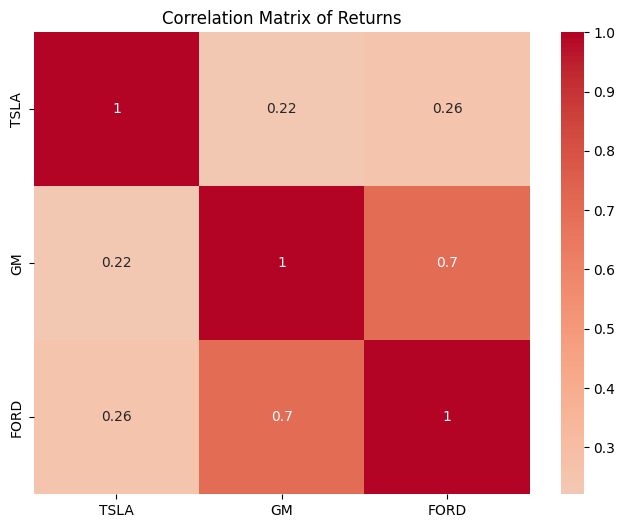

In [130]:
# Correlation Matrix

plt.figure(figsize=(8,6))
sns.heatmap(all_return.corr(),annot=True,cmap='coolwarm',center=0)
plt.title('Correlation Matrix of Returns')
plt.show()